In [101]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as pyplot
from cpp_algorithms import dist_fill
from cpp_algorithms import darp, stc, bcd, wavefront
from cpp_algorithms import get_drone_map, get_random_coords
from cpp_algorithms import get_all_area_maps, plot, imshow, imshow_scatter
from cpp_algorithms.darp.darp_helpers import get_assigned_count
from cpp_algorithms.coverage_path.pathing_helpers import has_isolated_areas

In [91]:
x = 50
y = 50
n = 4

area_map = np.zeros((x, y))
area_map[0, :] = 255
area_map[:, 0] = 255
area_map[x-1, :] = 255
area_map[:, y-1] = 255
start_points = [(9,9),(15, 15),(9, 20),(15, 25)]

  0%|          | 0/2500 [00:00<?, ?it/s]

  0%|          | 0/300 [00:00<?, ?it/s]

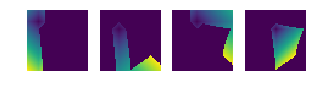

In [93]:
A, losses = darp(300, area_map, start_points, pbar=True, drone_coverage=1)
drone_maps = [get_drone_map(A,i) for i in range(n)]
coverage_paths = [stc(drone_maps[i],start_points[i]) for i in range(n)]
dist_maps = [dist_fill(drone_maps[i],[start_points[i]]) for i in range(n)]
[imshow(dist_maps[i],1,4,i+1) for i in range(n)];

assigned :  [625 625 625 625]
has isolated :  [False, False, False, False]


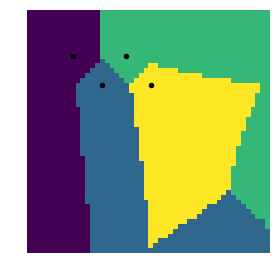

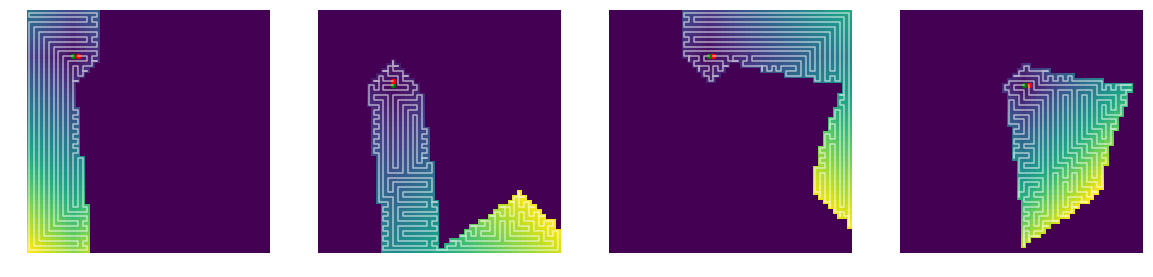

In [107]:
print("assigned : ", get_assigned_count(A))
print('has isolated : ',[has_isolated_areas(dm) for dm in drone_maps])
imshow(A,1,4,1, figsize=(20,20))
imshow_scatter(start_points,color="black")
pyplot.savefig('../../data/optimized_area_coverage.png', bbox_inches='tight', dpi=600)
for i in range(n):
    imshow(dist_maps[i],1,4,i+1, figsize=(20,20))
    plot(coverage_paths[i],color="white",alpha=0.6)
    end_point = coverage_paths[i][-1]
    imshow_scatter(start_points[i], color="green")
    imshow_scatter(end_point, color="red")
pyplot.savefig('../../data/optimized_area_coverage_individual.png', bbox_inches='tight', dpi=600)

In [88]:
lin_x = np.linspace(10, 390, x)
lin_y = np.linspace(10, 390, y)

In [108]:
f = open("../../data/optimized_area_coverage.txt", "w")
for idx, path in enumerate(coverage_paths):
    for i in range(len(path)):
        f.write(f'{lin_x[path[i][0]]} {lin_y[path[i][1]]} {idx}\n')
f.close()